In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 定数

In [2]:
import random
NUM_TEST = 300
PUBLIC_RATE = 0.3
random.seed(123)

### LeaderBoard

In [3]:
idx = [i for i in range(NUM_TEST)]
answers = [random.randint(0, 1) for _ in range(NUM_TEST)]

leaderboard = pd.DataFrame({
    'id': idx,
    'answers': answers,
})

In [4]:
pb = random.sample(list(leaderboard['id']), int(NUM_TEST*PUBLIC_RATE))
leaderboard['pb'] = [1 if v in pb else 0 for v in leaderboard['id']]

leaderboard.head()

,id,answers,pb
0,0,0,0
1,1,1,1
2,2,0,0
3,3,1,0
4,4,1,0


In [5]:
sum(leaderboard[leaderboard['pb']==1]['answers'])

53

### logloss

In [6]:
from sklearn.metrics import log_loss


def submit(pred):
    leaderboard_pb = leaderboard[leaderboard['pb']==1]
    pred_pb = pred[leaderboard['pb']==1]
    return log_loss(leaderboard_pb['answers'], pred_pb[[1, 2]])

取りあえずサブミットしてみる

乱数

In [7]:
sample_pred0 = [random.random() for _ in range(NUM_TEST)]
sample_pred1 = [1- val for val in sample_pred0]
sample_pred = [[v, sub0, sub1] for v, sub0, sub1 in zip(idx, sample_pred0, sample_pred1)]
sample_pred = pd.DataFrame(sample_pred)
sample_pred.head()

,0,1,2
0,0,0.341457,0.658543
1,1,0.143007,0.856993
2,2,0.675278,0.324722
3,3,0.291686,0.708314
4,4,0.669154,0.330846


In [8]:
submit(sample_pred)

1.005663971784754

### Hacking

In [9]:
def constSub(val):
    pred0 = [val for _ in range(NUM_TEST)]
    pred1 = [1 - val for _ in range(NUM_TEST)]
    pred = [[v, sub0, sub1] for v, sub0, sub1 in zip(idx, pred0, pred1)]
    pred = pd.DataFrame(pred)
    return submit(pred)

In [10]:
constSub(0.2)

0.79306456644127588

In [11]:
constSub(0.8)

1.0395168973070341

In [12]:
res = []
for i in range(1000):
    res.append(constSub(0.001*i))

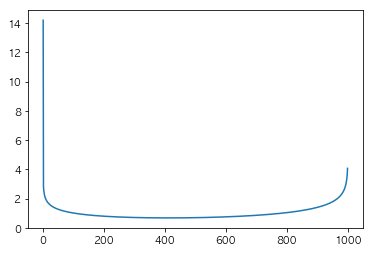

In [13]:
plt.plot(res)